1.  General analysis of dataset 

In [4]:
import pandas as pd # lets extract data from xls file to  DataFrame
ds = pd.read_excel (r'Porphyry Cu Geochemistry Module1.xlsx')
# replace Nan to zero
ds = ds.fillna(0)
# to exlore what is the columns names
columns_list = ds.columns.values.tolist()
f"{columns_list}"  # what kind of columns do we have with data ?

"['Sample', 'East', 'North', 'Elevation', 'holeid', 'from', 'to', 'Ag_ppm', 'Al_pct', 'As_ppm', 'Ba_ppm', 'Be_ppm', 'Bi_ppm', 'Ca_pct', 'Cd_ppm', 'Ce_ppm', 'Co_ppm', 'Cr_ppm', 'Cs_ppm', 'Fe_pct', 'Ga_ppm', 'Ge_ppm', 'Hf_ppm', 'In_ppm', 'K_pct', 'La_ppm', 'Li_ppm', 'Mg_pct', 'Mn_ppm', 'Mo_ppm', 'Na_pct', 'Nb_ppm', 'Ni_ppm', 'P_ppm', 'Pb_ppm', 'Rb_ppm', 'Re_ppm', 'S_pct', 'Sb_ppm', 'Sc_ppm', 'Se_ppm', 'Sn_ppm', 'Sr_ppm', 'Ta_ppm', 'Te_ppm', 'Th_ppm', 'Ti_pct', 'Tl_ppm', 'U_ppm', 'V_ppm', 'W_ppm', 'Y_ppm', 'Zn_ppm', 'Zr_ppm', 'SiO2']"

Because of high concentraion - this elements Al_pct,Fe_pct,S_pct,Na_pct,S_pct,Ti_pct was measured in weight percents -marked _ pcs. it is the basis of rock-samples components of local area porphyritic mineral. 

1.1  Geospatial data 

In [5]:
f"{ds['East'].iloc[0], ds['North'].iloc[0]}" # just to look, what  type of geospatial coordinates

'(12653.604888000002, 5949.422691999935)'

So the geospatial data is in the local rectangular coordinate system, no wgs84.

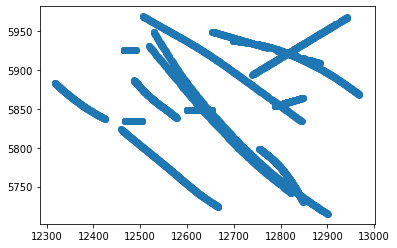

In [6]:
import matplotlib.pyplot as plt
plt.scatter(ds['East'], ds['North'])
plt.show() #  just to look 2D projection 

1.2 3D visualisation

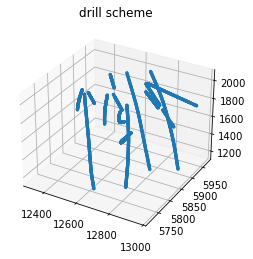

In [7]:
ax3d= plt.axes(projection ='3d')
# plotting 3D
ax3d.scatter(ds['East'], ds['North'], ds['Elevation'],marker='.')
ax3d.set_title('drill scheme')
plt.show()


So we have dataset contains a drilling samples from holes.

2.  Checking the data using basic statistics to detect anomalies
How to find ambiguity in the 183000+ data values ? Use the base statistics. 
2.1 Calculate standard deviation (D), skewness (S) and kurtosis (K) for all values for each chemical element.  
2.2 Plot the scatter diagramm S(D),K(D),K(S).  
2.3 Check the data with strange distribution for the errors  


In [8]:
#This dataset contains concentration values <0.  
min(ds['Ta_ppm']) 

-0.05

This value means that our data not filtered by the limit of detection (LOD)

In [9]:
import numpy as np
import math
from scipy.stats import skew, kurtosis
#initialization of dispersion , skew, kurtosis lists 
disp_m2_list=[]  #empty standard deviation list
assym_m3_list=[]  #empty skew list
exce_m4_list=[] #empty kurtosis list
columns_list_short=[] #empty column names list
marker_list=[] #empty marker list
#it's importants to clean up variables for the repeatable calculations
disp_m2_list.clear()
assym_m3_list.clear()
exce_m4_list.clear()
columns_list_short.clear()
marker_list.clear()
#calculate dispersion, skewness and kurtosis for all values on each element
# chemical elements data located in range of column 7 to end 
for i in range(7,len(columns_list)): 
    name=columns_list[i]   
    #You can also see graphs from variance or standart distribution 
    m2=math.sqrt(np.var(ds[name]))  #standart distribution  
    m2=np.var(ds[name])  #variance   

    m3=skew(ds[name]) 
    m4=kurtosis(ds[name]) 
    disp_m2_list.append(m2) #there will be standard deviation in this list or 
    assym_m3_list.append(m3)
    exce_m4_list.append(m4)
    columns_list_short.append(name)
#    print( "{0} {1} {2} {3} ".format( name,m2,m3,m4 )  )




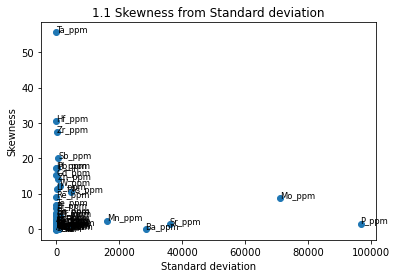

In [10]:
plt.scatter(disp_m2_list, assym_m3_list)
plt.title('1.1 Skewness from Standard deviation') 
plt.xlabel('Standard deviation')
plt.ylabel('Skewness')
for i in range(0,len(disp_m2_list)): 
    plt.text(disp_m2_list[i], assym_m3_list[i], columns_list_short[i][0:6], horizontalalignment='left', size='small', color='black')
plt.show()

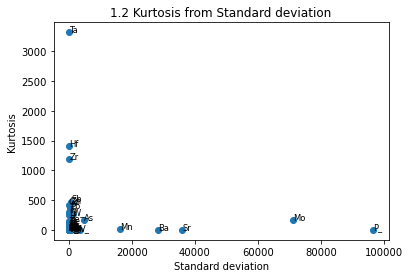

In [11]:
plt.scatter(disp_m2_list,  exce_m4_list)
plt.title('1.2 Kurtosis from Standard deviation')  
plt.xlabel('Standard deviation')
plt.ylabel('Kurtosis')
for i in range(0,len(disp_m2_list)): 
    plt.text(disp_m2_list[i], exce_m4_list[i], columns_list_short[i][0:2], horizontalalignment='left', size='small', color='black')
plt.show()

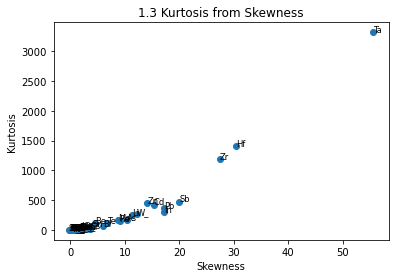

In [12]:
plt.scatter(assym_m3_list,exce_m4_list)
plt.title('1.3 Kurtosis from Skewness') 
plt.xlabel('Skewness')
plt.ylabel('Kurtosis')
for i in range(0,len(disp_m2_list)): 
    plt.text(assym_m3_list[i], exce_m4_list[i], columns_list_short[i][0:2], horizontalalignment='left', size='small', color='black')
plt.show()

Preliminary conclusions:
1. The laboratory measurements of elements Ma,Ba,Mo,Sr,P looks strange.
2. The data-series for elements Ta,Hf,Zr may contains single values with outstanding of measurements.
3. Tantalum value with index 1872 looks as single laboratory measurement outstanding or like contaminated sample
4. There is values lower than 0 - at the level of laboratory instrumental errors. 
Without information about the limits of detection (LOD or LorD) of chem laboratory instruments we can't do something with strange data near or lower zero. Due the reason to statistical analysis, negative data will be temporary used

So, let's look to the main elements data:


3.  The worst and the best cases of the dataset

3.1 What's wrong with the tanatlum ?

(array([3.604e+03, 2.210e+02, 4.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([-0.05 ,  0.437,  0.924,  1.411,  1.898,  2.385,  2.872,  3.359,
         3.846,  4.333,  4.82 ,  5.307,  5.794,  6.281,  6.768,  7.255,
         7.742,  8.229,  8.716,  9.203,  9.69 , 10.177, 10.664, 11.151,
        11.638, 12.125, 12.612, 13.099, 13.586, 14.073, 14.56 , 15.047,
        15.534, 16.021, 16.508, 16.995, 17.482, 17.969, 18.456, 18.943,
        19.43 , 

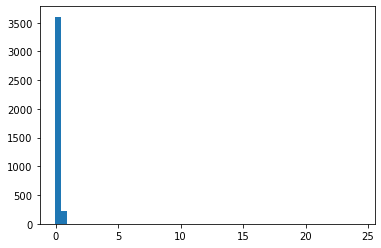

In [13]:
plt.hist(ds['Ta_ppm'],bins=50) #titanium

In [14]:
#sort and print top 10 values
local_Ta_ppm = ds.sort_values(by='Ta_ppm',ascending=False)    
local_Ta_ppm['Ta_ppm'].head(10)
# value with index 1872 looks as laboratory measurement outstanding or like contaminated sample 


1872    24.30
837      1.26
1950     1.17
1825     1.09
2427     0.94
3037     0.89
2957     0.85
3737     0.67
1346     0.66
1271     0.64
Name: Ta_ppm, dtype: float64

In [15]:
#initialization 
disp_m2_list=[]
assym_m3_list=[]
exce_m4_list=[]
columns_list_short=[]
marker_list=[]
disp_m2_list.clear()
assym_m3_list.clear()
exce_m4_list.clear()
columns_list_short.clear()
marker_list.clear()
#calculate dispertion, assimetry-skewness and excess statisics values
for i in range(7,len(columns_list)): 
    if columns_list[i] not in ['Mn_ppm','Ba_ppm','Sr_ppm','Mo_ppm','P_ppm','Ta_ppm','Hf_ppm','Zr_ppm','As_ppm','V_ppm'] :       
        name=columns_list[i]
        m2=math.sqrt(np.var(ds[name]))
        m3=skew(ds[name]) #is this normalized or it is only a moment of statistics value of 3d order?
        m4=kurtosis(ds[name]) #same questiin ?
        disp_m2_list.append(m2)
        assym_m3_list.append(m3)
        exce_m4_list.append(m4)
        columns_list_short.append(name)
        if   name[-1] == "m":
            marker_list.append('red')
        else:
            marker_list.append('blue')                
   # print( "{0} {1} {2} {3} ".format( name, m2, m3, m4 )  )

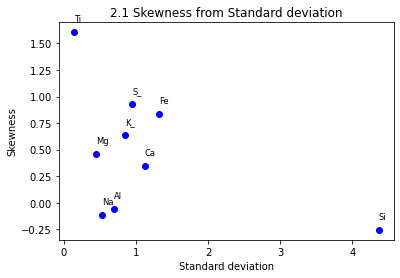

In [16]:
plt.clf()
plt.title('2.1 Skewness from Standard deviation') 
plt.xlabel('Standard deviation')
plt.ylabel('Skewness')
#plt.axis([-1, 10, -1, 5])
for i in range(0,len(disp_m2_list)): 
    # let's look at the main elements with concentration in pct 
    if  columns_list_short[i][-1] in ["t","2"]: # if "t" chart at the end the main elements with concentration in pct
        plt.scatter(disp_m2_list[i], assym_m3_list[i],color = marker_list[i])
        plt.text(disp_m2_list[i], assym_m3_list[i]+0.1, columns_list_short[i][0:2], horizontalalignment='left', size='small', color='black')
plt.show()

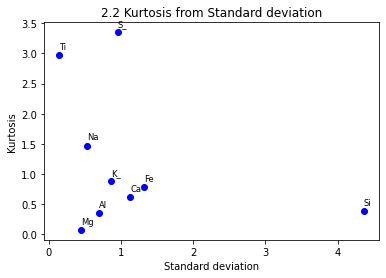

In [17]:
plt.clf()
plt.title('2.2 Kurtosis from Standard deviation')  
plt.xlabel('Standard deviation')
plt.ylabel('Kurtosis')
#plt.axis([-1, 10, -1, 5])
for i in range(0,len(disp_m2_list)): 
    if  columns_list_short[i][-1] in ["t","2"]:   # if "t" chart at the end the main elements with concentration in pct
        plt.scatter(disp_m2_list[i], exce_m4_list[i],color = marker_list[i])
        plt.text(disp_m2_list[i], exce_m4_list[i]+0.1, columns_list_short[i][0:2], horizontalalignment='left', size='small', color='black')
        #print (disp_m2_list[i], exce_m4_list[i],columns_list_short[i])
plt.show()

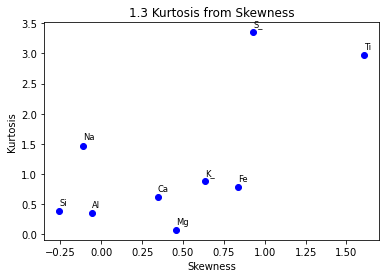

In [18]:
plt.title('1.3 Kurtosis from Skewness') 
plt.xlabel('Skewness')
plt.ylabel('Kurtosis')
for i in range(0,len(disp_m2_list)): 
      if  columns_list_short[i][-1] in ["t","2"]:  # if "t" chart at the end the main elements with concentration in pct
        plt.scatter(assym_m3_list[i], exce_m4_list[i],color = marker_list[i])
        plt.text(assym_m3_list[i], exce_m4_list[i]+0.1, columns_list_short[i][0:2], horizontalalignment='left', size='small', color='black')
plt.show()

3.2 Interesting view of the titanium "Ti_pct" 


Kurtosis=2.97 (for the normal distribution is =3), Skewness=0.147 (for the normal distribution is =0)  So it's looks like normal distribution with suspicion to bimodal distribution at the histogramm


(array([ 19.,  13.,  22.,  55.,  50.,  51.,  98., 157., 182., 228., 275.,
        330., 323., 356., 260., 221., 174., 151., 106., 105.,  72.,  47.,
         48.,  38.,  29.,  46.,  36.,  27.,  22.,  21.,  18.,   8.,  18.,
         21.,  21.,  18.,  16.,  17.,  11.,  20.,  19.,  23.,  14.,  13.,
         10.,   6.,   4.,   6.,   1.,   4.]),
 array([0.061  , 0.07896, 0.09692, 0.11488, 0.13284, 0.1508 , 0.16876,
        0.18672, 0.20468, 0.22264, 0.2406 , 0.25856, 0.27652, 0.29448,
        0.31244, 0.3304 , 0.34836, 0.36632, 0.38428, 0.40224, 0.4202 ,
        0.43816, 0.45612, 0.47408, 0.49204, 0.51   , 0.52796, 0.54592,
        0.56388, 0.58184, 0.5998 , 0.61776, 0.63572, 0.65368, 0.67164,
        0.6896 , 0.70756, 0.72552, 0.74348, 0.76144, 0.7794 , 0.79736,
        0.81532, 0.83328, 0.85124, 0.8692 , 0.88716, 0.90512, 0.92308,
        0.94104, 0.959  ]),
 <BarContainer object of 50 artists>)

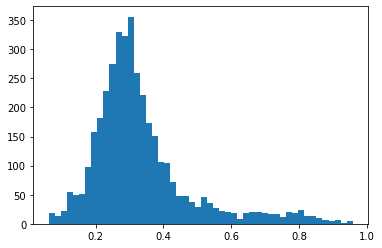

In [19]:
plt.hist(ds['Ti_pct'],bins=50) #titanium